- When you left 1 day ago, you worked on Fine-Tuning Your Model, chapter 3 of the course Supervised Learning with scikit-learn. Here is what you covered in your last lesson:

- You learned about the importance of hyperparameter tuning in optimizing machine learning models. Hyperparameters, such as alpha in ridge and lasso regression or n_neighbors in K-Nearest Neighbors (KNN), are set before fitting the model and can significantly affect model performance. Key points covered include:

*Hyperparameter Tuning*: The process of selecting the optimal hyperparameters for a learning algorithm, which involves testing different values, fitting models with these values, and choosing the best performing ones.  
*Cross-Validation*: To prevent overfitting hyperparameters to the test set, cross-validation is used, typically on the training set, to evaluate different hyperparameter values.  
*Grid Search*: A method for hyperparameter tuning that exhaustively searches through a specified subset of hyperparameters. For example, in a KNN model, you might search across different numbers of neighbors and types of distance metrics.  
*Randomized Search*: An alternative to grid search that selects random combinations of hyperparameters to test, which can be more efficient, especially when dealing with a large search space.  

You also worked through exercises using GridSearchCV and RandomizedSearchCV from sklearn.model_selection to perform hyperparameter tuning on regression and classification models. For instance, you tuned a lasso regression model to predict blood glucose levels using the diabetes_df dataset with:

```python
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
```

This lesson highlighted the balance between model complexity, computational efficiency, and performance optimization in machine learning.

The goal of the next lesson is to learn how to preprocess data for machine learning, focusing on converting categorical data into numeric form and applying regression models using scikit-learn.



# Preprocessing Data for Supervised Learning with scikit-learn

---

## 1. **Introduction & scikit-learn Data Requirements**

- **scikit-learn** requires **numeric data** with **no missing values**.
- In real-world datasets, data is often **not already numeric** and may contain **missing values**.
- Therefore, **preprocessing** data is a crucial step before building models.

---

## 2. **Dealing with Categorical Features**

- Datasets often contain **categorical features** (e.g., "color", "genre").
- **scikit-learn** cannot handle categorical features directly; it needs all input features to be numeric.
- **Solution:** Convert categorical features to **numeric** using **dummy variables** (also known as one-hot encoding).

---

## 3. **Dummy Variables Explained**

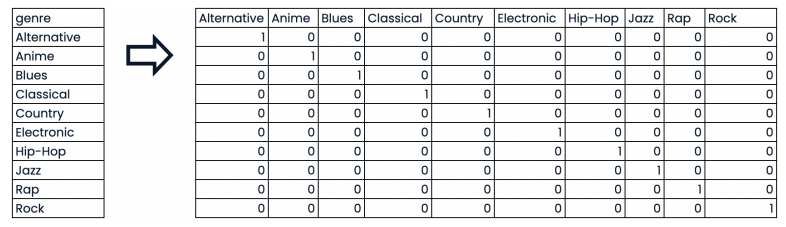

- A **dummy variable** is a binary (0/1) feature for each category.
    - **0**: Observation is **not** that category.
    - **1**: Observation **is** that category.
- For a categorical variable with _N_ categories, you typically need **N-1** dummy variables to avoid **duplicated information** (a problem called the "dummy variable trap").

    - *Example:* If a song's genre can be Jazz, Rap, or Rock:
        - Create two columns: Jazz and Rap.
        - If both are 0, the song must be Rock (the "dropped" baseline category).

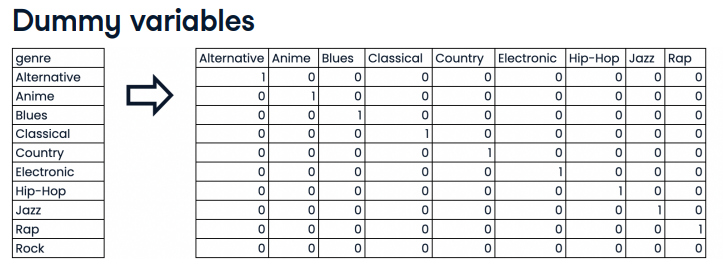

---

## 4. **Handling Categorical Features in Python**

- Two main tools:
    - `scikit-learn`'s `OneHotEncoder`
    - `pandas`' `get_dummies()`
- In this workflow, we will use **pandas' `get_dummies()`**.

---

## 5. **Music Dataset Overview**

- Dataset includes features like:
    - `popularity` (target variable)
    - `genre` (categorical feature)
    - Other numeric features: `acousticness`, `danceability`, `tempo`, etc.

```python
print(music.info())
```

**Sample Output:**
```
popularity  acousticness  danceability  ...  tempo   valence   genre
0   41.0        0.6440        0.823     ...  102.619  0.649   Jazz
1   62.0        0.0855        0.686     ...  173.915  0.636   Rap
2   42.0        0.2390        0.669     ...  145.061  0.494   Electronic
3   64.0        0.0125        0.522     ...  120.406  0.595   Rock
4   60.0        0.1210        0.780     ...   96.056  0.312   Rap
```

**Explanation:**
- `genre` is a categorical column with values like Jazz, Rap, Electronic, Rock, etc.
- We need to encode `genre` as dummy variables.

---

## 6. **Exploratory Data Analysis (EDA) with Categorical Features**

- Before encoding, you might visualize how the target variable (`popularity`) varies across genres (e.g., using a boxplot).
- After examining, proceed to encode the categorical feature.

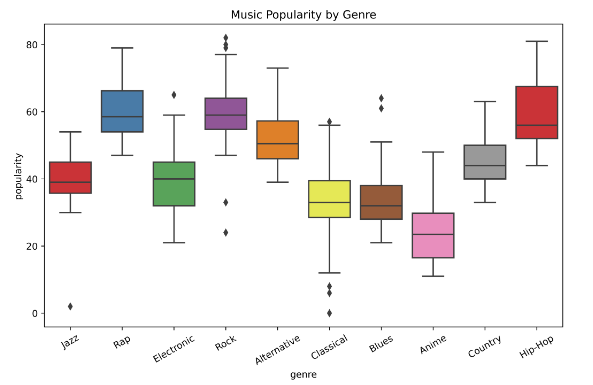

---

## 7. **Encoding Dummy Variables with `pandas.get_dummies()`**

### **Step-by-Step Example**

#### **Step 1: Import pandas and read in the data**

```python
import pandas as pd

music_df = pd.read_csv('music.csv')
```

- **`import pandas as pd`**: Imports the pandas library, which is essential for data manipulation in Python.
- **`pd.read_csv('music.csv')`**: Reads the CSV file containing the music data into a pandas DataFrame called `music_df`.

---

#### **Step 2: Create Dummy Variables for the 'genre' Column**

```python
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
print(music_dummies.head())
```

**Expected Output:**
```
   Anime  Blues  Classical  Country  Electronic  Hip-Hop  Jazz  Rap  Rock
0      0      0          0        0           0        0     1    0     0
1      0      0          0        0           0        0     0    1     0
2      0      0          0        0           1        0     0    0     0
3      0      0          0        0           0        0     0    0     1
4      0      0          0        0           0        0     0    1     0
```

**Line-by-Line Explanation:**
- **`pd.get_dummies(music_df["genre"], drop_first=True)`**:
    - Converts the 'genre' column into multiple binary columns, one for each genre except the first (to avoid redundancy).
    - `drop_first=True` drops the first category (acts as the baseline).
- **`print(music_dummies.head())`**: Displays the first five rows of the new dummy variables DataFrame.

**Output Significance:**
- Each row has a `1` in the column corresponding to its genre, and `0` elsewhere.
- The original `genre` column can now be replaced by these binary features.

---

#### **Step 3: Concatenate Dummy Variables Back to the Original DataFrame**

```python
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)
```

- **`pd.concat([music_df, music_dummies], axis=1)`**: Concatenates the original DataFrame and the dummy variables DataFrame **column-wise**.
- **`music_dummies.drop("genre", axis=1)`**: Removes the original 'genre' column, as it's now redundant.

---

#### **Alternative: Encoding All Categorical Variables at Once**

If your DataFrame only has one categorical feature, you can:

```python
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)
```

**Expected Output:**
```
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre_Anime', 'genre_Blues', 'genre_Classical',
       'genre_Country', 'genre_Electronic', 'genre_Hip-Hop', 'genre_Jazz',
       'genre_Rap', 'genre_Rock'],
      dtype='object')
```

**Line-by-Line Explanation:**
- **`pd.get_dummies(music_df, drop_first=True)`**: Automatically encodes all categorical columns, adding new columns with prefixes indicating the original feature (`genre_Anime`, etc.), and drops the first category.
- **`print(music_dummies.columns)`**: Lists all column names, confirming the new dummy variable columns.

**Significance:**
- This method is efficient when there are multiple categorical features.
- The original categorical columns are dropped automatically.

---

## 8. **Linear Regression with Dummy Variables**

Now, let's use the processed DataFrame (with dummy variables) to fit a regression model.

### **Step-by-Step Example**

#### **Step 1: Import Libraries and Prepare Data**

```python
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

**Line-by-Line Explanation:**
- **`from sklearn.model_selection ...`**: Imports utilities for splitting data and cross-validation.
- **`from sklearn.linear_model ...`**: Imports the LinearRegression model.
- **`import numpy as np`**: Imports numpy for numerical operations.
- **`X = music_dummies.drop("popularity", axis=1).values`**: Sets `X` as all features except the target, as a numpy array.
- **`y = music_dummies["popularity"].values`**: Sets `y` as the target variable.
- **`train_test_split(...)`**: Splits data into training and test sets, with 20% for testing.

---

#### **Step 2: Cross-Validation Setup and Model Training**

```python
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()

linreg_cv = cross_val_score(
    linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"
)
print(np.sqrt(-linreg_cv))
```

**Expected Output:**
```
[8.15792932 8.63117538 7.52275279 8.6205778 7.91329988]
```

**Line-by-Line Explanation:**
- **`kf = KFold(n_splits=5, shuffle=True, random_state=42)`**: Sets up 5-fold cross-validation, shuffling the data for each split.
- **`linreg = LinearRegression()`**: Instantiates a linear regression model.
- **`cross_val_score(...)`**:
    - Performs cross-validation, training and validating the model on different splits.
    - `scoring="neg_mean_squared_error"`: Returns the negative mean squared error for each fold (since scikit-learn expects higher scores to be better).
- **`np.sqrt(-linreg_cv)`**:
    - Converts negative MSEs to positive RMSEs for interpretability.
- **`print(...)`**: Prints RMSE for each fold.

**Significance of Output:**
- Each number represents the **root mean squared error (RMSE)** for one fold of cross-validation.
- Lower RMSE indicates better predictive performance.

---

## 9. **Summary & Key Takeaways**

- **scikit-learn** models require all features to be **numeric** with **no missing values**.
- **Categorical features** must be **converted to dummy variables**.
    - Use **`pandas.get_dummies()`** or **`scikit-learn`'s OneHotEncoder**.
    - Avoid the "dummy variable trap" by dropping one category (`drop_first=True`).
- After encoding, you can proceed with model training, validation, and evaluation as usual.
- **Interpreting results**:
    - Dummy variables make categorical data usable in regression or classification models.
    - RMSE (Root Mean Squared Error) is a common metric for regression performance.

---

**References:**
- [pandas.get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
- [scikit-learn: Handling categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

---



### Exercise
Creating dummy variables
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.

Instructions

Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.
Print the shape of music_dummies.
```python
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))


Before -> Shape of music_df: (1000, 12)
<script.py> output:
    Shape of music_dummies: (1000, 20)

```


### Exercise
Regression with categorical features
Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a KFold object stored as kf.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

Instructions

Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
Instantiate a ridge regression model, setting alpha equal to 0.2.
Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
Print the RMSE values by converting negative scores to positive and taking the square
```python
# Create X and y
X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

<script.py> output:
    Average RMSE: 8.2368538402023
    Standard Deviation of the target array: 14.02156909907019
In [2]:
```

# Handling Missing Data in Supervised Learning with scikit-learn

---

## 1. Introduction to Missing Data

- **Missing data**: Occurs when a feature (column) has no value in a particular row.
    - **Causes:** No observation, data corruption, or entry errors.
- **Why handle it?**
    - Most machine learning models (including scikit-learn) require **complete data**.
    - Ignoring missing data can bias results or cause errors.

---

## 2. Inspecting Missing Data with pandas

To examine missing values in a DataFrame:

```python
print(music_df.isna().sum().sort_values())
```

**Sample Output:**
```
genre                8
popularity          31
loudness            44
liveness            46
tempo               46
speechiness         59
duration_ms         91
instrumentalness    91
danceability       143
valence            143
acousticness       200
energy             200
dtype: int64
```

**Line-by-Line Explanation:**
- **`music_df.isna()`**: Returns a DataFrame of the same shape with `True` for missing values.
- **`.sum()`**: Sums up `True` values (treated as 1) in each column, giving the total number of missing entries per column.
- **`.sort_values()`**: Orders the output by number of missing values.

**Significance:**
- Shows how many values are missing in each feature.
- Useful for deciding how to handle columns with missing data.

---

## 3. Dropping Missing Data

A common strategy is to **drop rows** with missing values, especially if the number of missing entries is small (e.g., less than 5% of the data).

### **Code Example: Drop Rows with Missing Values in Certain Columns**

```python
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
print(music_df.isna().sum().sort_values())
```

**Sample Output:**
```
popularity           0
liveness             0
loudness             0
tempo                0
genre                0
duration_ms         29
instrumentalness    29
speechiness         53
danceability       127
valence            127
acousticness       178
energy             178
dtype: int64
```

**Line-by-Line Explanation:**
- **`dropna(subset=...)`**: Removes rows where any of the listed columns have missing values.
- **`print(...)`**: Confirms that selected columns now have zero missing values.

**Significance:**
- Ensures critical columns are complete.
- Reduces the number of rows, but preserves data quality for important features.

---

## 4. Imputation: Filling in Missing Values

Rather than dropping data, we can **impute** (fill in) missing values.

### **What is Imputation?**
- Use **subject-matter expertise** or statistical techniques to estimate missing values.
- **Common strategies:**
    - **Numeric features**: Replace with **mean** or **median** of the column.
    - **Categorical features**: Replace with the **most frequent value** (mode).

### **Important:**  
**Always split your data into training and test sets before imputation** to avoid **data leakage** (using information from the test set in training).

---

## 5. Imputation with scikit-learn's `SimpleImputer`

### **Step-by-Step Example: Handling Numeric and Categorical Data Separately**

#### **Step 1: Prepare Data**

```python
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Separate categorical and numerical features
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre", "popularity"], axis=1).values
y = music_df["popularity"].values

# Train-test split for categorical data
X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.2, random_state=12
)

# Train-test split for numerical data (same target, same random_state)
X_train_num, X_test_num, _, _ = train_test_split(
    X_num, y, test_size=0.2, random_state=12
)
```

**Line-by-Line Explanation:**
- **`from sklearn.impute import SimpleImputer`**: Imports the SimpleImputer class for filling in missing values.
- **`from sklearn.model_selection import train_test_split`**: Imports function to split data for training/testing.
- **`music_df["genre"].values.reshape(-1, 1)`**: Extracts the 'genre' column (categorical) as a 2D array.
- **`music_df.drop(["genre", "popularity"], axis=1).values`**: Extracts all numeric features as a 2D array.
- **`music_df["popularity"].values`**: Target variable array.
- **`train_test_split(..., test_size=0.2, random_state=12)`**: Splits data into 80% training / 20% testing. Using the same `random_state` ensures that corresponding target values are aligned across splits.

---

#### **Step 2: Impute Categorical Data (Most Frequent)**

```python
imp_cat = SimpleImputer(strategy="most_frequent")

X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)
```

**Line-by-Line Explanation:**
- **`SimpleImputer(strategy="most_frequent")`**: Creates an imputer that fills missing values with the most common value in the column.
- **`fit_transform(X_train_cat)`**: Learns the most frequent value from the training set and fills in missing values.
- **`transform(X_test_cat)`**: Applies the same learned value to fill missing entries in the test set.

**Significance:**
- Ensures no missing categorical values remain.
- Avoids data leakage by only learning from training data.

---

#### **Step 3: Impute Numeric Data (Mean)**

```python
imp_num = SimpleImputer()  # Default strategy is "mean"

X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
```

**Line-by-Line Explanation:**
- **`SimpleImputer()`**: Defaults to filling missing values with the mean of the column.
- **`fit_transform(X_train_num)`**: Learns the mean from training set and fills missing values.
- **`transform(X_test_num)`**: Applies learned means to the test set.

---

#### **Step 4: Combine Imputed Data**

```python
import numpy as np

X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)
```

**Line-by-Line Explanation:**
- **`np.append(..., axis=1)`**: Concatenates numeric and categorical arrays column-wise.
- **Purpose:** Reconstructs the complete feature set for modeling.

---

## 6. Imputing Within a Pipeline

- **Pipelines** allow you to chain preprocessing steps and modeling into a single object, making workflows cleaner and less error-prone.

### **Example: Imputation + Classification Pipeline**

#### **Step 1: Prepare Data for Classification**

```python
import numpy as np

# Drop rows with missing values in key columns (less than 5% missing)
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert 'genre' to binary: 1 if 'Rock', else 0
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
```

**Line-by-Line Explanation:**
- **`dropna(subset=...)`**: Drops rows with missing values in the specified columns.
- **`np.where(... == "Rock", 1, 0)`**: Converts the 'genre' column to a binary variable (Rock = 1, others = 0).
- **`drop("genre", axis=1).values`**: Features for modeling.
- **`music_df["genre"].values`**: Target for classification.

---

#### **Step 2: Build and Use the Pipeline**

```python
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define pipeline steps
steps = [
    ("imputation", SimpleImputer()),
    ("logistic_regression", LogisticRegression())
]
pipeline = Pipeline(steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit pipeline and score
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(score)
```

**Expected Output:**
```
0.7593582887700535
```

**Line-by-Line Explanation:**
- **`Pipeline(steps)`**: Chains together an imputer and a logistic regression model.
- **`train_test_split(...)`**: Splits the data for training/testing.
- **`pipeline.fit(X_train, y_train)`**: Applies imputation to training data, then fits the logistic regression model.
- **`pipeline.score(X_test, y_test)`**: Imputes missing values in test set, predicts, and computes accuracy.
- **`print(score)`**: Displays the classification accuracy.

**Significance:**
- Pipelines automate preprocessing and modeling in a single object.
- Ensures no data leakage and reproducible workflows.

---

## 7. Key Takeaways

- **Missing data** must be handled before modeling.
- **Dropping rows** is simple, but can waste data.
- **Imputation** allows you to keep more data by filling in missing values, using:
    - **Mean/median** for numeric features.
    - **Most frequent** for categorical features.
- **Split your data before imputing!** Avoid data leakage.
- **scikit-learn's `SimpleImputer`** is a flexible tool for imputation.
- **Pipelines** let you combine preprocessing and modeling steps, making code cleaner and safer.

---
---

**References:**
- [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- [scikit-learn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [scikit-learn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

---

### Exercise
Dropping missing data
Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

Instructions 1/3

Print the number of missing values for each column in the music_df dataset, sorted in ascending order.
```python
# Print missing values for each column
print(music_df.isna().sum().sort_values())

<script.py> output:
    genre                 8
    popularity           31
    loudness             44
    liveness             46
    tempo                46
    speechiness          59
    instrumentalness     91
    duration_ms          91
    danceability        143
    valence             143
    energy              200
    acousticness        200
    dtype: int64

```
Remove values for all columns with 50 or fewer missing values.

```python
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])

In [3]:
music_df.isna().sum().sort_values()
Out[3]:

popularity            0
loudness              0
liveness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
energy              178
acousticness        178
dtype: int64
```

Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.
```python
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

<script.py> output:
    genre                 8
    popularity           31
    loudness             44
    liveness             46
    tempo                46
    speechiness          59
    instrumentalness     91
    duration_ms          91
    danceability        143
    valence             143
    energy              200
    acousticness        200
    dtype: int64
    popularity            0
    loudness              0
    liveness              0
    tempo                 0
    genre                 0
    duration_ms          29
    instrumentalness     29
    speechiness          53
    danceability        127
    valence             127
    energy              178
    acousticness        178
    dtype: int64
    Shape of the `music_df`: (892, 12)

```

### Exercise
Pipeline for song genre prediction: I
Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

Instructions

Import SimpleImputer and Pipeline.
Instantiate an imputer.
Instantiate a KNN classifier with three neighbors.
Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".
```python
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

```


### Exercise
Pipeline for song genre prediction: II
Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.

Instructions

Create a pipeline using the steps you previously defined.
Fit the pipeline to the training data.
Make predictions on the test set.
Calculate and print the confusion matrix.
```python
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


<script.py> output:
    [[79  9]
     [ 4 82]]

```
how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 79 true positives and 82 true negatives!

# Centering and Scaling in Supervised Learning with scikit-learn

---

## 1. Introduction: Why Center and Scale Our Data?

- **Centering and scaling** (also called **normalization** or **standardization**) are key preprocessing steps in machine learning.
- Many models (like KNN) use **distance** to make predictions, so features with larger scales can dominate the model.
- **Goal:** Put all features on a **similar scale** to ensure fair model training.

---

## 2. Inspecting Feature Scales

Let's explore the scale of some features in the music dataset:

```python
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())
```

**Expected Output:**
```
         duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.176493e+05    -8.284354     0.078642
std    1.137703e+05     5.065447     0.088291
min   -1.000000e+00   -38.718000     0.023400
25%    1.831070e+05    -9.658500     0.033700
50%    2.176493e+05    -7.033500     0.045000
75%    2.564468e+05    -5.034000     0.078642
max    1.617333e+06    -0.883000     0.710000
```

**Explanation:**
- `duration_ms` can be as large as 1.6 million.
- `speechiness` stays between 0.02 and 0.71.
- `loudness` has only negative values.
- **Significance:** These very different scales can **unfairly bias** the model unless we scale the data.

---

## 3. Why Scale Our Data?

- **Distance-based models** (like KNN) are influenced by feature scale.
- Features with large numeric ranges dominate the distance metric, skewing results.
- **Remedy:** Make features comparable by scaling.

---

## 4. Methods for Scaling and Centering

- **Standardization:** Subtract the mean, divide by the standard deviation (feature has mean 0, variance 1).
- **Min-max scaling:** Subtract the minimum, divide by the range (feature scaled between 0 and 1).
- **Normalization:** Scale to a fixed range, e.g., -1 to 1.
- **This lesson:** Focus on **standardization** (most common).

---

## 5. Scaling Data with scikit-learn

### Step 1: Preparing the Data

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

**Line-by-line explanation:**
- `music_df.drop("genre", axis=1).values`: Removes the "genre" column and converts remaining features to a NumPy array.
- `music_df["genre"].values`: Target variable (genre).
- `train_test_split(...)`: Splits data into training and testing sets (80% train, 20% test).

---

### Step 2: Standardizing Features

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**Line-by-line explanation:**
- `StandardScaler()`: Constructs a scaler for standardization.
- `scaler.fit_transform(X_train)`: Fits the scaler to the training data (computes mean and std) and scales it.
- `scaler.transform(X_test)`: Scales the test set using the mean/std from the training set (important to avoid data leakage).

---

### Step 3: Checking Means and Standard Deviations

```python
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))
```

**Expected Output:**
```
19801.42536120538 71343.52910125865
2.260817795600319e-17 1.0
```

**Explanation:**
- The original data has a large mean and std (driven by high-range features).
- The scaled training data has a mean very close to 0 and std of 1.
- **Significance:** Scaling has successfully centered and standardized the data.

---

## 6. Scaling in a scikit-learn Pipeline

Pipelines automate preprocessing + modeling, ensuring transformations are applied correctly.

### Code Example

```python
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
```

**Expected Output:**
```
0.81
```

**Line-by-line explanation:**
- **Pipeline steps**: Standardizes the data, then fits a KNN classifier with 6 neighbors.
- **train_test_split**: Splits the data.
- **pipeline.fit(...)**: Fits scaler and model sequentially.
- **pipeline.predict(...)**: Predicts genre labels for test data.
- **pipeline.score(...)**: Computes accuracy on test data.

**Significance:**
- Using scaling **inside a pipeline** ensures that scaling is always applied correctly (no data leakage).
- **Accuracy:** 0.81 (81%) using scaled data.

---

## 7. Comparing Performance: Scaled vs. Unscaled Data

Let's see how much scaling helps:

```python
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))
```

**Expected Output:**
```
0.53
```

**Explanation:**
- **No scaling:** KNN accuracy is just 53%.
- **With scaling:** 81% accuracy.
- **Significance:** Scaling improves model performance dramatically for distance-based algorithms.

---

## 8. Cross-Validation and Scaling in a Pipeline

You can tune model hyperparameters with scaling using cross-validation in a pipeline.

### Code Example

```python
from sklearn.model_selection import GridSearchCV

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
```

**Line-by-line explanation:**
- **Pipeline:** Standardization and KNN classifier.
- **parameters:** Dictionary for grid search; keys use the format `step__param`.
- **GridSearchCV:** Searches over different numbers of neighbors.
- **cv.fit:** Fits the pipeline with all parameter combinations using cross-validation.
- **cv.predict:** Predicts genres for the test set.

---

### Checking the Best Model

```python
print(cv.best_score_)
print(cv.best_params_)
```

**Expected Output:**
```
0.8199999999999999
{'knn__n_neighbors': 12}
```

**Explanation:**
- **best_score_:** The best cross-validated score found during grid search (slightly better than default K=6).
- **best_params_:** The value of K that achieved the best score (here, 12 neighbors).
- **Significance:** Cross-validation plus scaling finds the **optimal model setup**.

---

## 9. Key Takeaways

- **Scaling features** is critical for models sensitive to feature scale (especially KNN, SVM, etc.).
- **Standardization** (mean=0, std=1) is a common scaling technique.
- Always **fit the scaler on training data only** to avoid data leakage.
- Use **pipelines** to chain preprocessing and modeling steps for safety and clarity.
- **Scaling can dramatically improve model performance**.

---
---

**References:**
- [scikit-learn: StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [scikit-learn: Pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline)
- [scikit-learn: GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

---


### Exercise
Centering and scaling for regression
Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

Instructions

Import StandardScaler.
Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
Instantiate a pipeline with steps to scale and build a lasso regression model.
Calculate the R-squared value on the test data.
```python
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))


<script.py> output:
    0.6193523316282489
In [1]:
```


Exercise
Centering and scaling for classification
Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.

Instructions

Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
Instantiate the grid search object.
Fit the grid search object to the training data.
```python
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)


<script.py> output:
    0.8412499999999999 
     {'logreg__C': np.float64(0.1061578947368421)}
In [1]:

```


# Evaluating Multiple Models in Supervised Learning (with scikit-learn)

---

## 1. Introduction: Why Evaluate Multiple Models?

- The process of selecting a model is a key step in the supervised learning workflow.
- **Key Question:** *How do we choose which model to use?*
- The answer depends on several factors, including:
    - The problem at hand
    - The nature and size of the dataset
    - The need for interpretability
    - Desired flexibility and accuracy

---

## 2. Different Models for Different Problems

### Guiding Principles

- **Dataset Size:**
    - **Fewer features** → Simpler models, faster training.
    - **Larger datasets** may be needed for complex models (e.g., Artificial Neural Networks).
- **Interpretability:**
    - Some models (e.g., **Linear Regression**) are easier to explain to stakeholders due to interpretable coefficients.
- **Flexibility:**
    - Flexible models can capture more complex patterns by making fewer assumptions (e.g., **KNN** does not assume linearity between features and the target).

---

## 3. Model Evaluation Metrics

### Regression Tasks

- **Root Mean Squared Error (RMSE):** Measures average difference between predicted and actual values.
- **R-squared:** Proportion of variance explained by the model.

### Classification Tasks

- **Accuracy:** Proportion of correct predictions.
- **Confusion Matrix:** Shows counts of true/false positives/negatives.
- **Precision, Recall, F1-score:** Useful for imbalanced classes.
- **ROC AUC:** Measures separability of classes.

### Key Point

- **scikit-learn** offers a unified interface for many models, making comparison straightforward.
- **Approach:** Train several models, evaluate their performance using chosen metrics (without tuning hyperparameters initially).

---

## 4. The Importance of Feature Scaling

### Why Scale?

- Some models are **sensitive to the scale of input features**:
    - **KNN, Linear Regression (and Ridge/Lasso), Logistic Regression, Artificial Neural Networks**
- **Best practice:** Scale your data **before** evaluating models.

---

## 5. Evaluating Classification Models: Step-by-Step

### 5.1. Import Required Libraries

```python
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
```

#### **Explanation:**

- `matplotlib.pyplot as plt`: For plotting results.
- `StandardScaler`: For standardizing the feature data.
- `cross_val_score`: For cross-validation scoring.
- `KFold`: For splitting data into k-folds.
- `train_test_split`: For creating train/test splits.
- Classifiers from `sklearn`: KNN, Logistic Regression, and Decision Tree.

---

### 5.2. Prepare the Data

```python
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

#### **Explanation Line-by-Line:**

1. `X = music.drop("genre", axis=1).values`
    - **What:** Removes the "genre" column (target) from the DataFrame to get feature values.
    - **Why:** We want only features in `X` (inputs to the model).
    - **Result:** `X` is a NumPy array of features.

2. `y = music["genre"].values`
    - **What:** Extracts the "genre" column as the target variable.
    - **Why:** This is what we're trying to predict.
    - **Result:** `y` is a NumPy array of target labels.

3. `X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)`
    - **What:** Splits features and target into training and test sets.
    - **Why:** To train on one part (`train`) and evaluate on another (`test`).
    - **Result:** Four arrays: `X_train`, `X_test`, `y_train`, `y_test`.

4. `scaler = StandardScaler()`
    - **What:** Creates a scaler object.
    - **Why:** To standardize features (zero mean, unit variance).
    - **Result:** `scaler` can be fit to data.

5. `X_train_scaled = scaler.fit_transform(X_train)`
    - **What:** Fits scaler to training data, then transforms it.
    - **Why:** Learn mean/std from train set to avoid data leakage.
    - **Result:** `X_train_scaled` is the standardized training data.

6. `X_test_scaled = scaler.transform(X_test)`
    - **What:** Transforms test data using training data's mean and std.
    - **Why:** Ensures test data is on the same scale as training.
    - **Result:** `X_test_scaled` is the standardized test data.

---

### 5.3. Setting Up Models and Cross-Validation

```python
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()
```
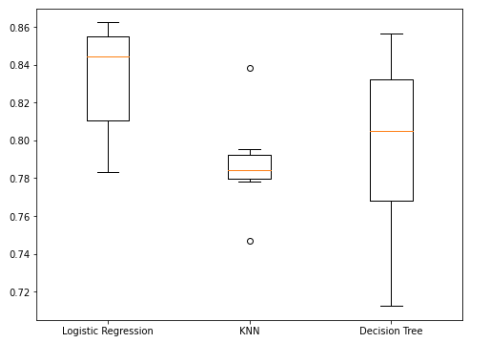

#### **Explanation Line-by-Line:**

1. `models = { ... }`
    - **What:** Creates a dictionary mapping model names to their instantiated objects.
    - **Why:** Makes it easy to loop through and reference each model by name.

2. `results = []`
    - **What:** Initializes a list to store cross-validation results.
    - **Why:** To collect accuracy scores for each model.

3. `for model in models.values():`
    - **What:** Iterates over each model instance.
    - **Why:** To evaluate each model in turn.

4. `kf = KFold(n_splits=6, random_state=42, shuffle=True)`
    - **What:** Sets up KFold cross-validation with 6 splits.
    - **Why:** To split the data into 6 parts for cross-validation, ensuring results are robust.

5. `cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)`
    - **What:** Performs cross-validation for the current model.
    - **Why:** To assess model performance on multiple splits, avoiding overfitting to one split.
    - **Result:** `cv_results` is an array of accuracy scores.

6. `results.append(cv_results)`
    - **What:** Stores the results for this model.

7. `plt.boxplot(results, labels=models.keys())`
    - **What:** Creates a boxplot for the cross-validation accuracies of each model.
    - **Why:** To visualize the range and median of model performances.

8. `plt.show()`
    - **What:** Displays the plot.

#### **Expected Output:**

- A boxplot with three boxes, one for each model ("Logistic Regression", "KNN", "Decision Tree").
- Each box shows the spread (min, Q1, median, Q3, max) of cross-validation accuracies.
- **Median** line (orange) indicates typical performance.
- *In the example, Logistic Regression had the best median score.*

---

### 5.4. Visualizing Results

- The boxplot directly shows:
    - **Range** of cross-validation scores for each model.
    - **Median** performance (the orange line).
- **Interpretation:** The model with the highest median is typically preferred (here, Logistic Regression).

---

### 5.5. Evaluating Test Set Performance

```python
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))
```

#### **Explanation Line-by-Line:**

1. `for name, model in models.items():`
    - **What:** Loops through each model name and instance.

2. `model.fit(X_train_scaled, y_train)`
    - **What:** Fits the model to the scaled training data.
    - **Why:** To train the model before evaluating on test data.

3. `test_score = model.score(X_test_scaled, y_test)`
    - **What:** Calculates the accuracy on the scaled test data.
    - **Why:** To measure how well the model generalizes to unseen data.

4. `print("{} Test Set Accuracy: {}".format(name, test_score))`
    - **What:** Prints the test set accuracy for each model.
    - **Why:** To compare final performance.

#### **Expected Output Example:**

```
Logistic Regression Test Set Accuracy: 0.844
KNN Test Set Accuracy: 0.82
Decision Tree Test Set Accuracy: 0.832
```

- **Interpretation:** Logistic Regression achieved the highest accuracy on the test set, making it the best choice (given accuracy as the metric).

---

## 6. Summary & Practical Guidance

- **Evaluate multiple models**: Different models suit different data and problems.
- **Use appropriate metrics** for your task (e.g., accuracy, precision, recall, ROC AUC for classification).
- **Scale your features** before model evaluation, especially for scale-sensitive models.
- **Use cross-validation** to estimate performance robustly.
- **Visualize model performance** to compare at a glance.
- **Final selection** is based on test set performance; in this example, Logistic Regression was best.

---


### Exercise
Visualizing regression model performance
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

Instructions

Write a for loop using model as the iterator, and model.values() as the iterable.
Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
Append the model's cross-validation scores to the results list.
Create a box plot displaying the results, with the x-axis labels as the names of the models.
```python
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

```
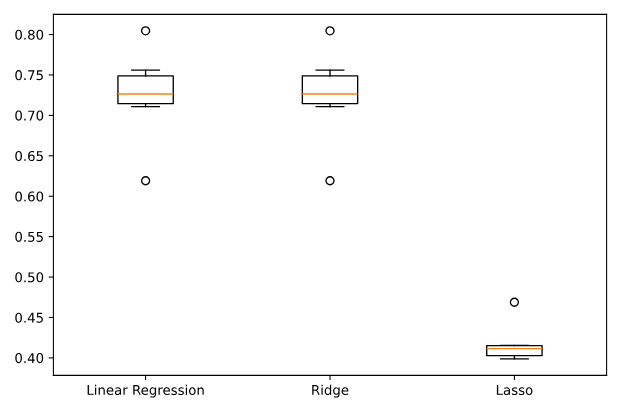

### Exercise
Predicting on the test set
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

Instructions

Import root_mean_squared_error.
Fit the model to the scaled training features and the training labels.
Make predictions using the scaled test features.
Calculate RMSE by passing the test set labels and the predicted labels.
```python
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

for name, model in models.items():
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

    <script.py> output:
    Linear Regression Test Set RMSE: 0.1198885150594757
    Ridge Test Set RMSE: 0.11987066103299669

```

### Exercise
Visualizing classification model performance
In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

Instructions

Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
Loop through the values in models.
Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.
```python
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()
```
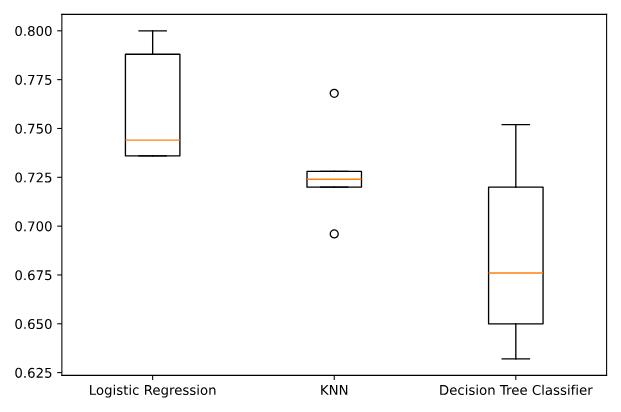

### Exercise
Pipeline for predicting song popularity
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

Instructions

Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
Create a pipeline object, and pass the steps variable.
Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
Print the best parameters and compute and print the test set accuracy score for the grid search object.
```python
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_,
    tuning.score(X_test, y_test)))

<script.py> output:
    Tuned Logistic Regression Parameters: {'logreg__C': np.float64(0.112), 'logreg__solver': 'newton-cg'}, Accuracy: 0.82

```

## Supervised Learning with scikit-learn: Course Summary

---

## 2. What Covered

Let's recap the key topics and skills you've learned in this course:

### Building Predictive Models
- **Supervised learning** techniques allow you to build models that can predict outcomes.
    - **Regression problems**: Predict continuous values (e.g., house prices).
    - **Classification problems**: Predict categories (e.g., spam vs. not spam).

### Underfitting and Overfitting
- **Underfitting:** Model is too simple; fails to capture underlying trend.
- **Overfitting:** Model is too complex; captures noise as well as trend.
- **Goal:** Find a balance so your model generalizes well to new data.

### Data Splitting & Cross-Validation
- **Train/Test Split:** Dividing data to train and test model performance.
- **Cross-validation:** Rotating which data is used for training/testing to better estimate performance.

### Data Preprocessing Techniques
- **Preprocessing:** Cleaning, scaling, encoding, and transforming data so models can learn effectively.

### Model Selection
- **Choosing the right model:** Comparing different algorithms to find the best fit for your data and problem.

### Hyperparameter Tuning
- **Optimizing model settings:** Adjusting parameters (like `k` in KNN) to improve performance.

### 📊 Model Performance Evaluation
- **Metrics:** Using appropriate scores (accuracy, RMSE, F1-score, etc.) to assess how well your model works.

### Using Pipelines
- **Pipelines:** Automating and chaining preprocessing and modeling steps for cleaner, more reproducible workflows.

---

## 3. Where to Go From Here?

some suggested next steps:

- **Machine Learning with Tree-Based Models in Python**
    - Dive deeper into decision trees, random forests, and boosting.
- **Preprocessing for Machine Learning in Python**
    - Advanced techniques for preparing data.
- **Model Validation in Python**
    - Best practices for assessing and validating models.
- **Feature Engineering for Machine Learning in Python**
    - Creating and transforming features to improve models.
- **Unsupervised Learning in Python**
    - Explore clustering, dimensionality reduction, and more.
- **Machine Learning Projects**
    - Apply your skills in practical, real-world projects.

---

In [ ]:
# Course Completed Supervised Learning using scikit-learn